# **"Pima Indians Diabetes Database"** (Диабетті болжау) деректер жинағы

# Үй жұмысы: Медициналық диагноз қою (Binary Classification)
## Тақырыбы: Диабетті болжау (Diabetes Prediction)

**Мақсаты:**
Бұл жұмыста сіз дайын, тазаланған сандық деректер жинағын қолдана отырып, нейрондық желі құруды үйренесіз. Мақсат – пациенттің медициналық көрсеткіштеріне қарап, оның диабетпен ауыру ықтималдығын болжау.

**Қысқаша теория:**
Біз қарапайым `Feed Forward Neural Network` (Алға таралу желісін) қолданамыз.
Деректер жинағы толығымен сандық болғандықтан, күрделі өңдеу жұмыстары (мәтінді санға айналдыру) қажет емес.

Желі құрылымы:
1.  **Input Layer:** 8 кіріс параметрі (Глюкоза, Қан қысымы, Инсулин және т.б.).
2.  **Hidden Layers:** Ақпаратты өңдеуші қабаттар (`ReLU` активациясымен).
3.  **Output Layer:** 1 нейрон (0 = Диабет жоқ, 1 = Диабет бар), `Sigmoid` активациясымен.

**Тапсырма:**
Төменде `# TODO` деп көрсетілген жерлерді кодпен толықтырыңыз.


In [1]:
# Қажетті кітапханаларды импорттау
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# TensorFlow нұсқасын тексеру
print(f"TensorFlow Version: {tf.__version__}")

TensorFlow Version: 2.20.0



### 1. Деректер жинағын жүктеу

Біз "Pima Indians Diabetes" датасетін тікелей GitHub-тан жүктейміз. Бұл нақты медициналық деректер.


In [2]:
# Деректерді тікелей сілтемеден оқу
url = "https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv"
df = pd.read_csv(url)

# Деректердің алғашқы 5 жолын көрсету
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



### 2. Деректерді шолу

Деректердің типтерін тексеріңіз. Барлығы сандық форматта болғандықтан, `Encoding` (мәтінді кодтау) қажет емес.


In [ ]:
# TODO: Деректер жинағының ақпаратын (info) шығарыңыз
# Барлық бағаналар "int" немесе "float" екеніне көз жеткізіңіз
# Сіздің кодыңыз төменде:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB



### 3. X және y айнымалыларына бөлу

* **X (Features):** Диагнозға әсер ететін факторлар (алғашқы 8 бағана).
* **y (Target):** `Outcome` бағанасы (1 - ауру бар, 0 - ауру жоқ).


In [4]:
# X және y бөлу
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values

# Жаттығу және тест жиындарына бөлу (Test size = 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train shape: {X_train.shape}")
print(f"Test shape: {X_test.shape}")

Train shape: (614, 8)
Test shape: (154, 8)



### 4. Деректерді масштабтау (Normalization)

Деректер таза болса да (мәтінсіз), олардың өлшем бірліктері әртүрлі (мысалы, Инсулин жүздеген бірлік, ал Жасы ондаған бірлік).
Нейрондық желі дұрыс жұмыс істеуі үшін оларды `StandardScaler` арқылы бір диапазонға келтіру керек.



In [5]:
# Деректерді стандарттау
scaler = StandardScaler()

# X_train деректеріне бейімдеу және түрлендіру
X_train = scaler.fit_transform(X_train)

# X_test деректерін тек түрлендіру (model data leakage болмауы үшін)
X_test = scaler.transform(X_test)


### 5. Нейрондық желі архитекурасы

`Keras` көмегімен модель құрыңыз.
Ұсынылатын құрылым:
* **Input:** 8 нейрон (кіріс деректер санына сәйкес).
* **Hidden 1:** 12 нейрон, `relu` активациясы.
* **Hidden 2:** 8 нейрон, `relu` активациясы.
* **Output:** 1 нейрон, `sigmoid` активациясы.



In [6]:
# Модельді инициализациялау
model = tf.keras.models.Sequential()

# TODO: Қабаттарды (Layers) қосыңыз

model.add(tf.keras.layers.Dense(12, activation='relu', input_shape=(8,)))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

c:\Users\jekim\OneDrive\Desktop\Notes-on-ML-Courses\tf_venv\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


** Компиляция

In [7]:
# Модельді компиляциялау
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Оқыту

### 6. Модельді оқыту (Training)

Модельді 100-150 `epochs` аралығында оқытып көріңіз. `batch_size` параметрін 16 немесе 32 деп алыңыз.



In [8]:
# TODO: Модельді оқытыңыз (fit функциясын қолданыңыз)
# Нәтижені 'history' айнымалысына сақтаңыз
# validation_split=0.1 параметрін қосуды ұмытпаңыз

# Сіздің кодыңыз төменде:
history = model.fit(X_train, y_train, 
                    epochs=150, 
                    batch_size=32, 
                    validation_split=0.1, 
                    verbose=1)

Epoch 1/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5145 - loss: 0.6992 - val_accuracy: 0.5968 - val_loss: 0.7114
Epoch 2/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6304 - loss: 0.6827 - val_accuracy: 0.5806 - val_loss: 0.7009
Epoch 3/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6540 - loss: 0.6684 - val_accuracy: 0.5968 - val_loss: 0.6907
Epoch 4/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6757 - loss: 0.6546 - val_accuracy: 0.5806 - val_loss: 0.6826
Epoch 5/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6775 - loss: 0.6405 - val_accuracy: 0.5645 - val_loss: 0.6732
Epoch 6/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6793 - loss: 0.6257 - val_accuracy: 0.5484 - val_loss: 0.6643
Epoch 7/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6830 - loss: 0.6099 - val_accuracy: 0.5484 - val_loss: 0.6542
Epoch 8/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6902 - loss: 0.5942 - val_accuracy: 0.5806 - v


### 7. Нәтижелерді визуализациялау

Модельдің оқыту барысындағы дәлдігі (accuracy) мен қателігін (loss) графикке саламыз.



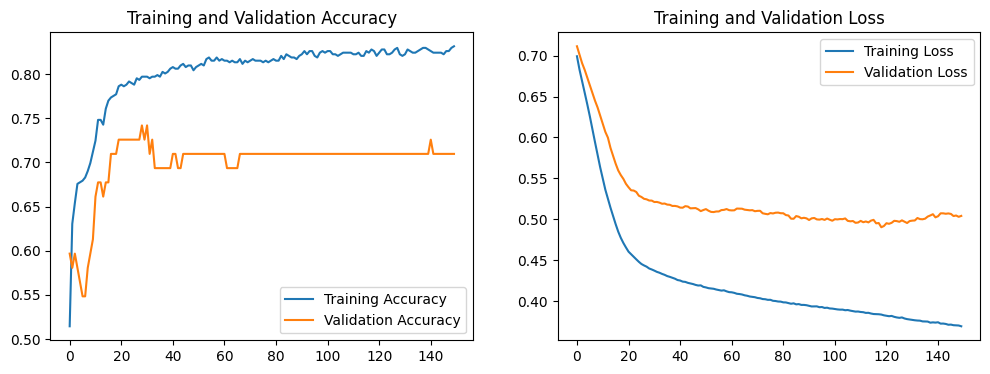

In [9]:
# Графиктерді салу функциясы
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 4))

    # Accuracy графигі
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    # Loss графигі
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

plot_history(history)

Бағалау

In [15]:
from sklearn.metrics import confusion_matrix

# Болжам жасау
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Нәтижелер
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print(" \n")

# Тест жиынында тексеру
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Set Accuracy: {accuracy*100:.2f}%")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Confusion Matrix:
[[78 21]
 [20 35]]
 

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7338 - loss: 0.6304 
Test Set Accuracy: 73.38%



### Қорытынды

Бұл жұмыста сіз:
1.  Алдын ала өңдеуді қажет етпейтін таза сандық деректермен жұмыс істедіңіз.
2.  Медициналық деректер негізінде диагноз қоятын нейрондық желі жасадыңыз.

**Сұрақ:** Егер жасырын қабаттар санын көбейтсеңіз, модельдің дәлдігі қалай өзгереді? Тәжірибе жасап көріңіз.


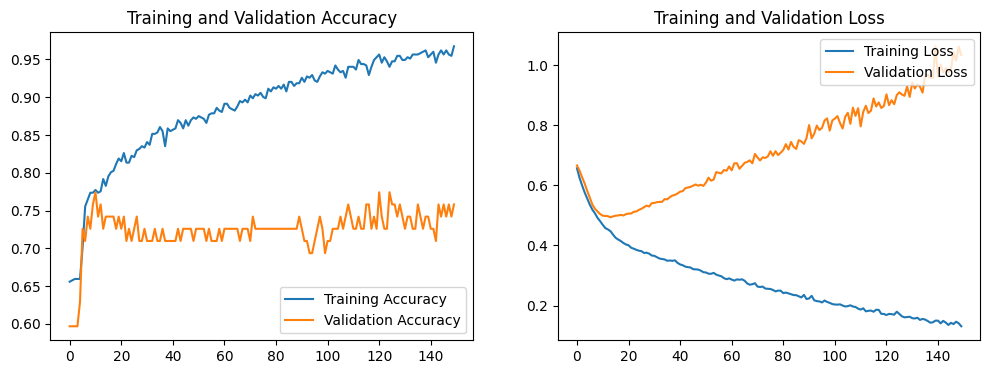

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Confusion Matrix:
[[72 27]
 [16 39]]
 

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7208 - loss: 1.3530 
Test Set Accuracy: 72.08%


In [17]:
model = tf.keras.models.Sequential()


model.add(tf.keras.layers.Dense(18, activation='relu', input_shape=(8,)))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(12, activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))



model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, 
                    epochs=150, 
                    batch_size=32, 
                    validation_split=0.1, 
                    verbose=0)

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 4))

    # Accuracy графигі
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    # Loss графигі
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

plot_history(history)


from sklearn.metrics import confusion_matrix

# Болжам жасау
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Нәтижелер
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print(" \n")

# Тест жиынында тексеру
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Set Accuracy: {accuracy*100:.2f}%")